In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from llama_index.graph_stores.neo4j import Neo4jPGStore

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [3]:
import nest_asyncio

nest_asyncio.apply()

# Environment setup
In this blog post, we will use Neo4j as the underlying graph store. The easiest way is to get started is to a free instance on Neo4j Aura, which offers cloud instances of the Neo4j database. Alternatively, you can also set up a local instance of the Neo4j database by downloading the Neo4j Desktop application and creating a local database instance.

In [4]:
username="neo4j"
password="YOUR_PASSWORD"
url="bolt://localhost:7687"

graph_store = Neo4jPGStore(
    username=username,
    password=password,
    url=url,
    sanitize_query_output=False
)


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The procedure has a deprecated field. ('config' used by 'apoc.meta.graphSample' is deprecated.)} {position: line: 1, column: 1, offset: 0} for query: "CALL apoc.meta.graphSample() YIELD nodes, relationships RETURN nodes, [rel in relationships | {name:apoc.any.property(rel, 'type'), count: apoc.any.property(rel, 'count')}] AS relationships"


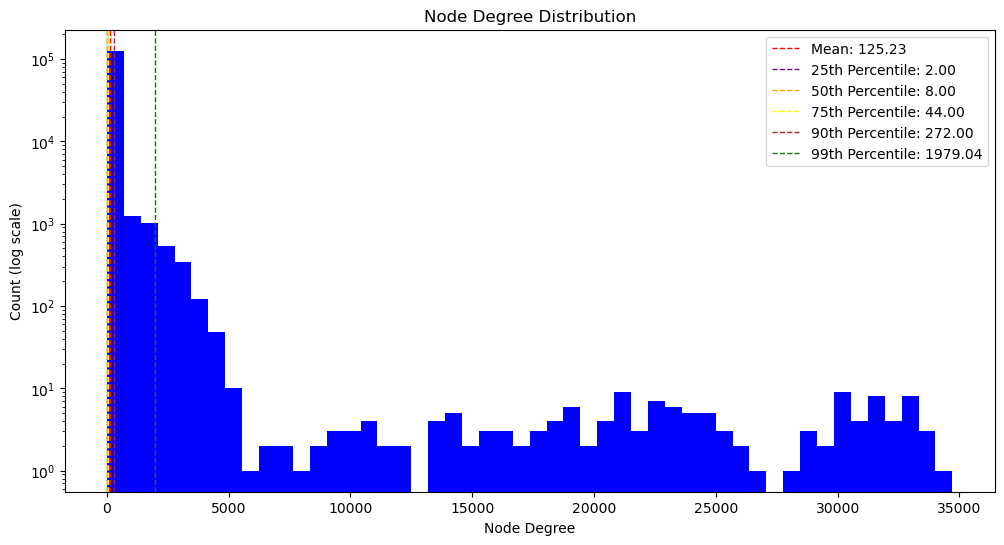

In [5]:
degree_dist = graph_store.structured_query(
    """
MATCH (e:Entity)
RETURN count {(e)-[]-()} AS node_degree
"""
)

degree_dist_df = pd.DataFrame.from_records(degree_dist)

percentile_number = [25, 50, 75, 90, 99]
colors = ['purple', 'orange', 'yellow', 'brown', 'green']

# Calculate mean and median
mean_degree = np.mean(degree_dist_df['node_degree'])
percentiles = np.percentile(degree_dist_df['node_degree'], percentile_number)

# Create a histogram with a logarithmic scale
plt.figure(figsize=(12, 6))
plt.hist(degree_dist_df['node_degree'], bins=50, color='blue')
# Use a logarithmic scale for the x-axis
plt.yscale('log')
# Adding labels and title
plt.xlabel('Node Degree')
plt.ylabel('Count (log scale)')
plt.title('Node Degree Distribution')
# Add mean, median, and percentile lines
plt.axvline(mean_degree, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_degree:.2f}')
for (percentile, perc_num, color) in zip(percentiles, percentile_number, colors):
    plt.axvline(percentile, color=color, linestyle='dashed', linewidth=1, label=f'{perc_num}th Percentile: {percentile:.2f}')

# Add legend
plt.legend()
# Show the plot
plt.show()

In [26]:
relations = ['anatomy', 'biological_process', 'cellular_component', 'disease',
       'drug', 'effect/phenotype', 'exposure', 'gene/protein',
       'molecular_function', 'pathway']

query_type_template = """
MATCH (e:Entity)
WHERE e.type = "{type}"
RETURN count {{(e)-[]-()}} AS node_degree
"""

In [27]:
query_type_template.format(type=relation)

'\nMATCH (e:Entity)\nWHERE e.type = "associated with"\nRETURN count {(e)-[]-()} AS node_degree\n'

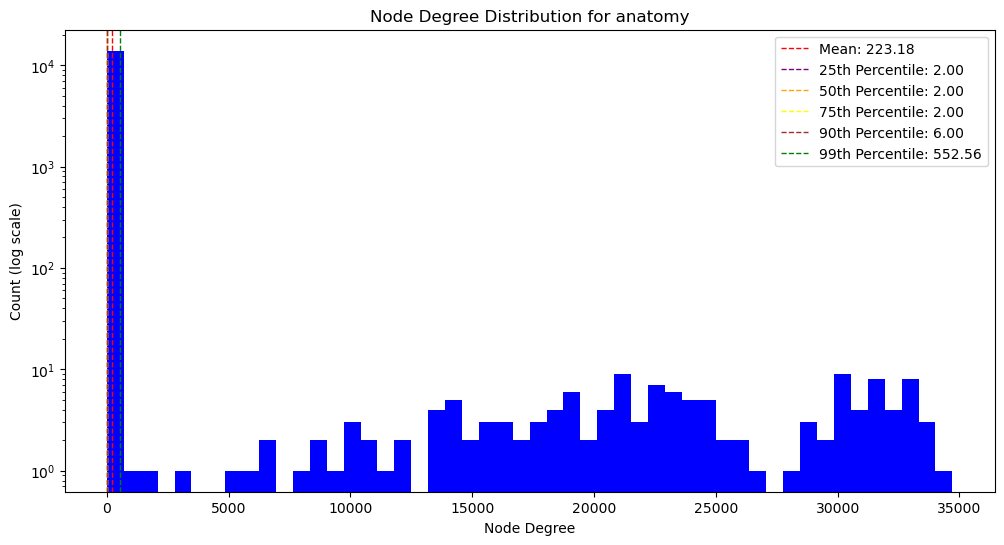

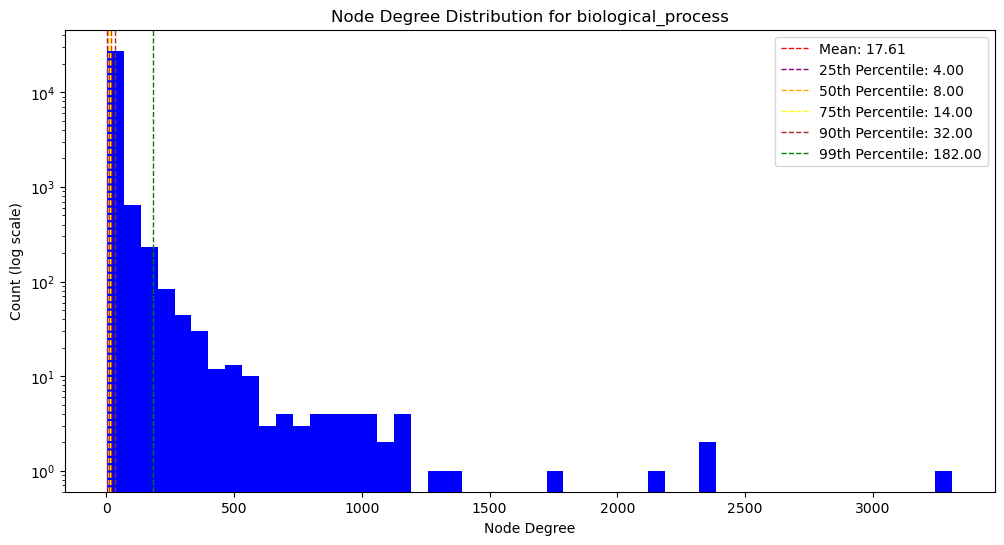

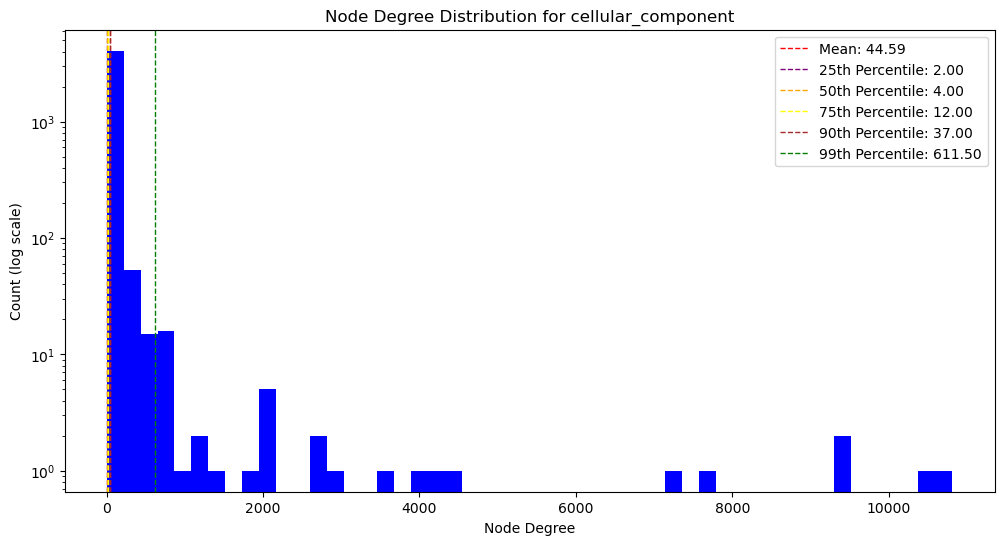

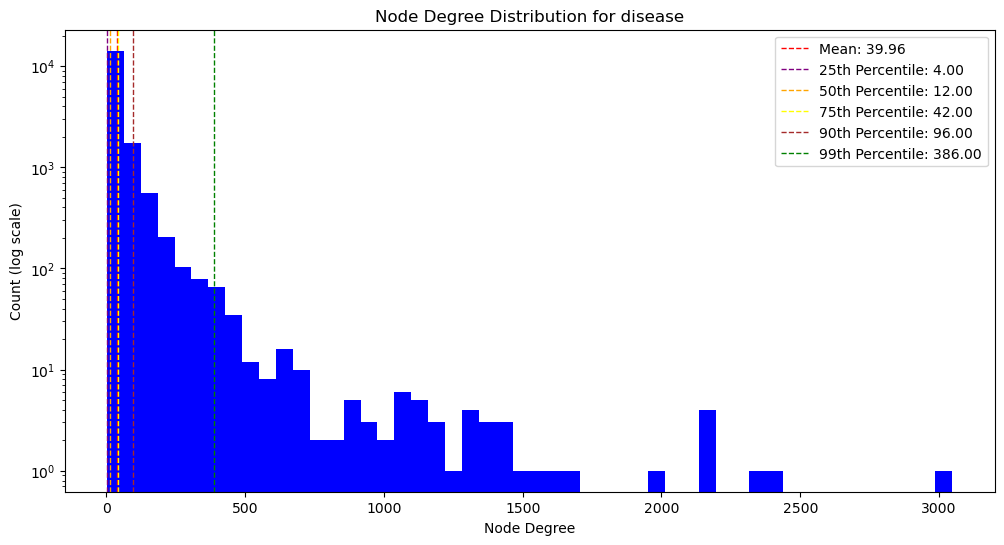

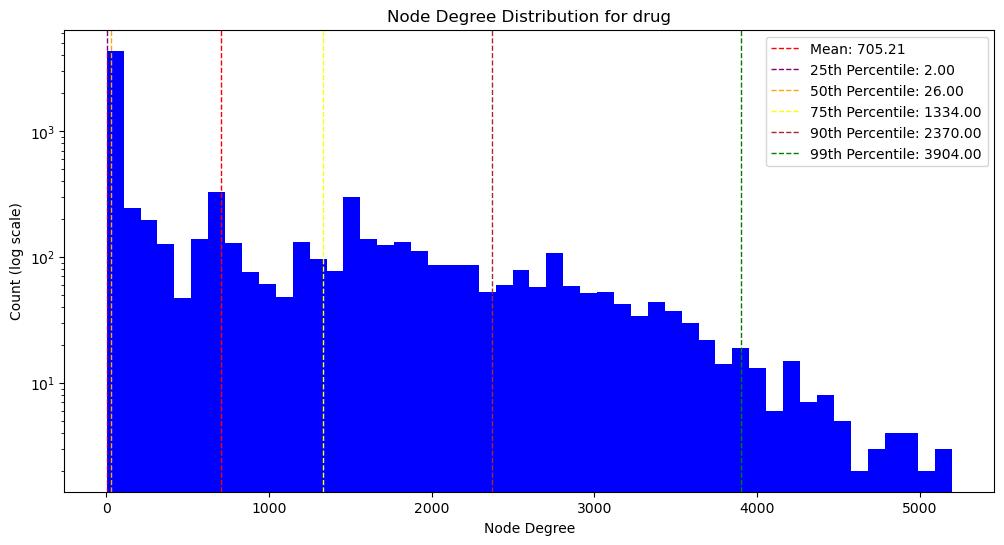

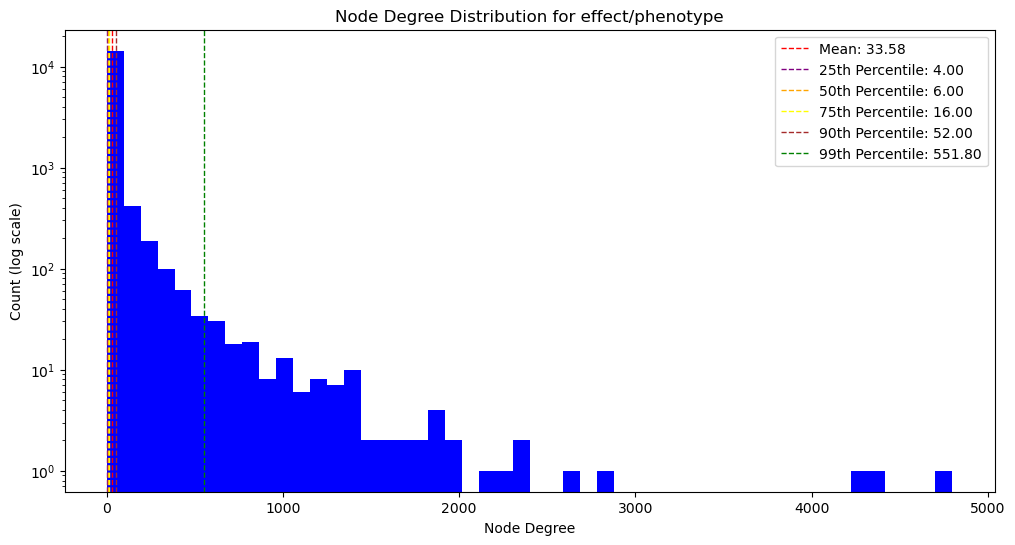

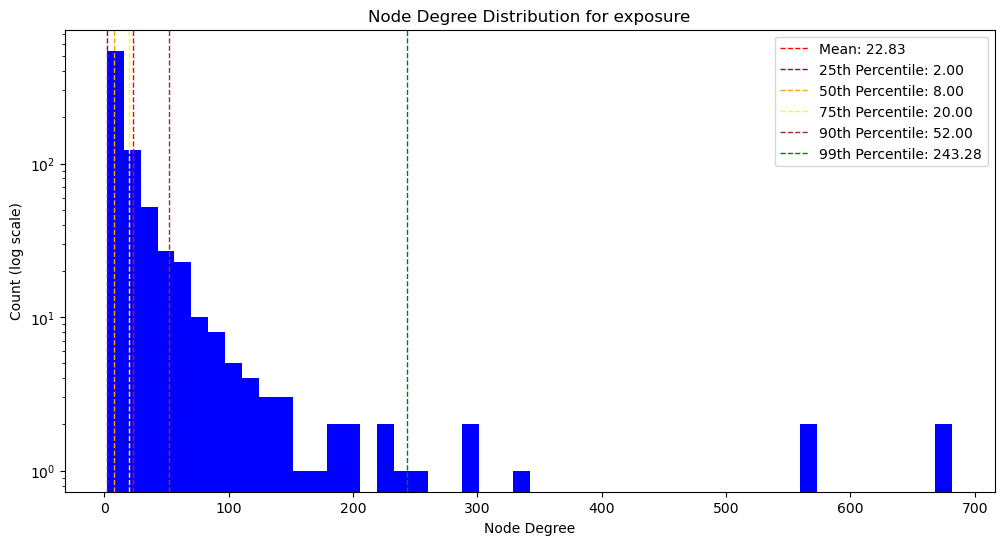

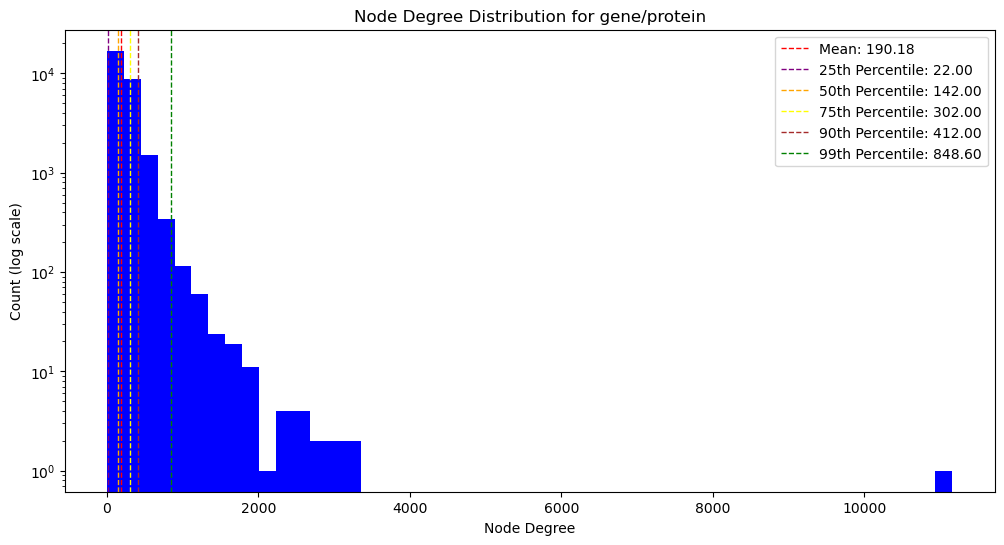

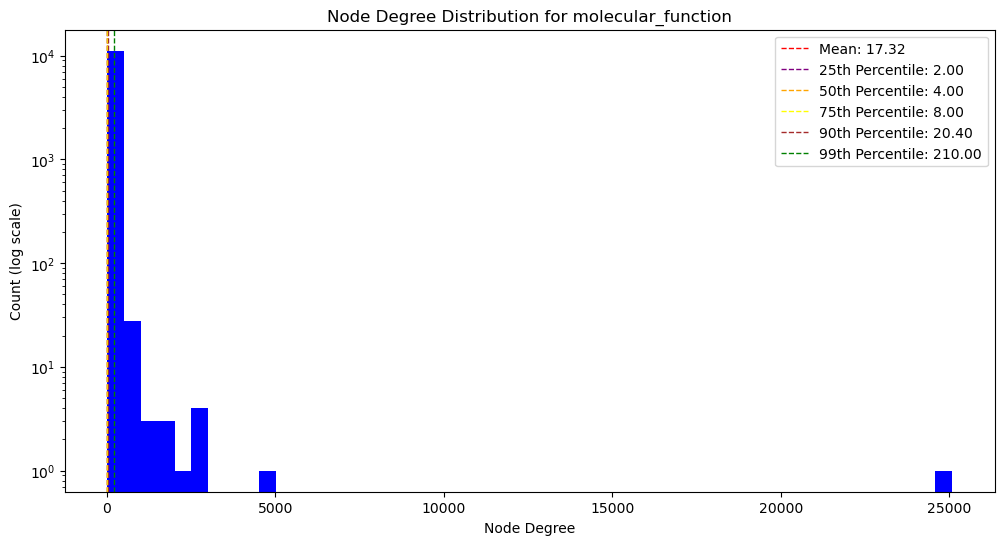

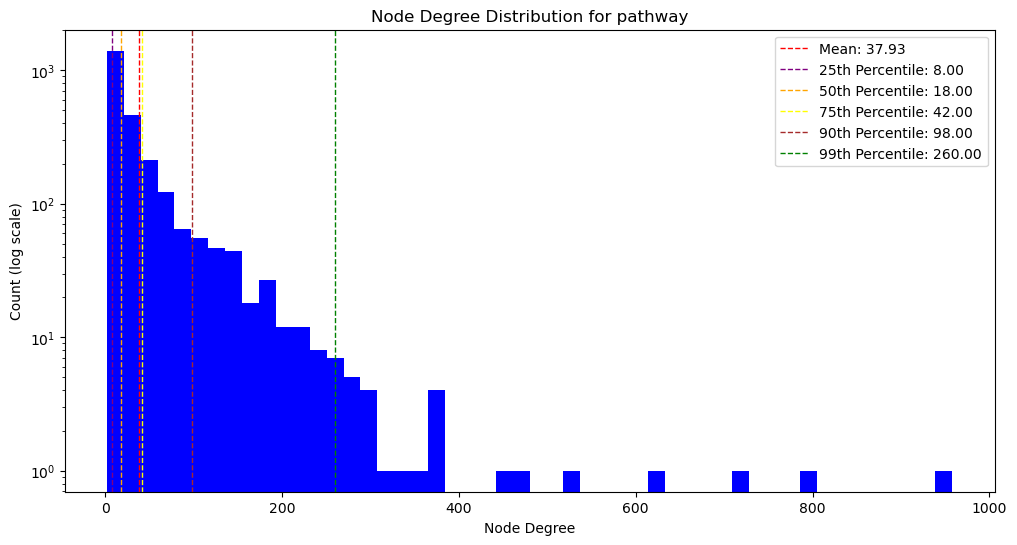

In [29]:
for relation in relations:
    degree_dist = graph_store.structured_query(query_type_template.format(type=relation))

    degree_dist_df = pd.DataFrame.from_records(degree_dist)


    percentile_number = [25, 50, 75, 90, 99]
    colors = ['purple', 'orange', 'yellow', 'brown', 'green']

    # Calculate mean and median
    mean_degree = np.mean(degree_dist_df['node_degree'])
    percentiles = np.percentile(degree_dist_df['node_degree'], percentile_number)

    # Create a histogram with a logarithmic scale
    plt.figure(figsize=(12, 6))
    plt.hist(degree_dist_df['node_degree'], bins=50, color='blue')
    # Use a logarithmic scale for the x-axis
    plt.yscale('log')
    # Adding labels and title
    plt.xlabel('Node Degree')
    plt.ylabel('Count (log scale)')
    plt.title('Node Degree Distribution for ' + relation)
    # Add mean, median, and percentile lines
    plt.axvline(mean_degree, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_degree:.2f}')
    for (percentile, perc_num, color) in zip(percentiles, percentile_number, colors):
        plt.axvline(percentile, color=color, linestyle='dashed', linewidth=1, label=f'{perc_num}th Percentile: {percentile:.2f}')

    # Add legend
    plt.legend()
    # Show the plot
    plt.show()